In [1]:
import warnings
warnings.filterwarnings('ignore')
import itertools
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
plt.style.use('ggplot')
import pickle

In [2]:
with open('pred_returns.pickle', 'rb') as f:
    top20zipcode_df = pickle.load(f)

In [3]:
zipcode_list = list(top20zipcode_df['zipcode'])

In [4]:
%run ./updated_zillow_data.ipynb

FileNotFoundError: File b'SingleFamilyResidence.csv' does not exist

In [5]:
with open('train.pickle', 'rb') as f:
    train_df = pickle.load(f)

In [6]:
train_df.head()

,RegionName,City,State,Metro,CountyName,RegionID,SizeRank,time,value
0,60657,Chicago,IL,Chicago-Naperville-Elgin,Cook County,84654,1,2012-01-01,739600.0
1,77494,Katy,TX,Houston-The Woodlands-Sugar Land,Harris County,91982,2,2012-01-01,248800.0
2,60614,Chicago,IL,Chicago-Naperville-Elgin,Cook County,84616,3,2012-01-01,931300.0
3,77449,Katy,TX,Houston-The Woodlands-Sugar Land,Harris County,91940,4,2012-01-01,116000.0
4,79936,El Paso,TX,El Paso,El Paso County,93144,5,2012-01-01,112400.0


In [7]:
unique = list((train_df['RegionName'].unique()))

In [8]:
intersection = list(set(zipcode_list).intersection(unique))

In [9]:
intersection

[33313,
 89030,
 33830,
 33064,
 34207,
 33705,
 32905,
 32744,
 33069,
 48237,
 33805,
 30032,
 33713,
 30288,
 32117,
 66102,
 37210,
 33020,
 29405,
 33023]

In [10]:
def retrieving_zipcode_info(df, intersection):
    
    top20zipcode = {}
    
    for zipcode in intersection:
        returns = df.loc[(df['RegionName'] == zipcode)][['time', 'value']]
        returns = returns.set_index('time')

        top20zipcode[zipcode] = returns

    return top20zipcode

In [11]:
top20zipcode_dicts = retrieving_zipcode_info(train_df, intersection)

In [12]:
top20zipcode_dicts[32905]

,value
time,
2012-01-01,55000.0
2012-02-01,55300.0
2012-03-01,55900.0
2012-04-01,56600.0
2012-05-01,56600.0
2012-06-01,56400.0
2012-07-01,56500.0
2012-08-01,57400.0
2012-09-01,58700.0


In [13]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
pdqs = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [14]:
# Run a grid with pdq and seasonal pdq parameters calculated above and get the best AIC value
ans = []
for comb in pdq:
    for combs in pdqs:
        try:
            mod = sm.tsa.statespace.SARIMAX(top20zipcode_dicts[32905],
                                            order=comb,
                                            seasonal_order=combs,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            output = mod.fit()
            ans.append([comb, combs, output.aic])
            print('ARIMA {} x {}12 : AIC Calculated ={}'.format(comb, combs, output.aic))
        except:
            continue

/Users/jjherranzsarrion/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/jjherranzsarrion/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (0, 0, 0) x (0, 0, 0, 12)12 : AIC Calculated =1788.5618059291992
ARIMA (0, 0, 0) x (0, 0, 1, 12)12 : AIC Calculated =1462.4678203036453
ARIMA (0, 0, 0) x (0, 1, 0, 12)12 : AIC Calculated =1291.1405275729512


/Users/jjherranzsarrion/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/jjherranzsarrion/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (0, 0, 0) x (0, 1, 1, 12)12 : AIC Calculated =1035.6799798238856
ARIMA (0, 0, 0) x (1, 0, 0, 12)12 : AIC Calculated =1203.4332443339854
ARIMA (0, 0, 0) x (1, 0, 1, 12)12 : AIC Calculated =1169.112374504554


/Users/jjherranzsarrion/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/jjherranzsarrion/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/jjherranzsarrion/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/jjherranzsarrion/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (0, 0, 0) x (1, 1, 0, 12)12 : AIC Calculated =945.8172221751499


/Users/jjherranzsarrion/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/jjherranzsarrion/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/jjherranzsarrion/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/jjherranzsarrion/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/jjherranzsarrion/anaconda3/envs/learn-env/lib/python3.6/

ARIMA (0, 0, 0) x (1, 1, 1, 12)12 : AIC Calculated =928.8620462990781
ARIMA (0, 0, 1) x (0, 0, 0, 12)12 : AIC Calculated =1716.6500255546227
ARIMA (0, 0, 1) x (0, 0, 1, 12)12 : AIC Calculated =1476.355614410032
ARIMA (0, 0, 1) x (0, 1, 0, 12)12 : AIC Calculated =1271.3380077082763
ARIMA (0, 0, 1) x (0, 1, 1, 12)12 : AIC Calculated =1383.709822750611
ARIMA (0, 0, 1) x (1, 0, 0, 12)12 : AIC Calculated =1539.9898710554548


/Users/jjherranzsarrion/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/jjherranzsarrion/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/jjherranzsarrion/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (0, 0, 1) x (1, 0, 1, 12)12 : AIC Calculated =1407.2923125411317
ARIMA (0, 0, 1) x (1, 1, 0, 12)12 : AIC Calculated =1009.5034650651414


/Users/jjherranzsarrion/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/jjherranzsarrion/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (0, 0, 1) x (1, 1, 1, 12)12 : AIC Calculated =1230.262641149156
ARIMA (0, 1, 0) x (0, 0, 0, 12)12 : AIC Calculated =1200.8144198438144
ARIMA (0, 1, 0) x (0, 0, 1, 12)12 : AIC Calculated =972.4303323730423
ARIMA (0, 1, 0) x (0, 1, 0, 12)12 : AIC Calculated =957.6687385470512


/Users/jjherranzsarrion/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/jjherranzsarrion/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/jjherranzsarrion/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/jjherranzsarrion/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (0, 1, 0) x (0, 1, 1, 12)12 : AIC Calculated =759.2792302002866
ARIMA (0, 1, 0) x (1, 0, 0, 12)12 : AIC Calculated =973.1803584344055
ARIMA (0, 1, 0) x (1, 0, 1, 12)12 : AIC Calculated =958.8055899146766
ARIMA (0, 1, 0) x (1, 1, 0, 12)12 : AIC Calculated =775.7869117371781


/Users/jjherranzsarrion/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/jjherranzsarrion/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/jjherranzsarrion/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/jjherranzsarrion/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/jjherranzsarrion/anaconda3/envs/learn-env/lib/python3.6/site-pack

ARIMA (0, 1, 0) x (1, 1, 1, 12)12 : AIC Calculated =762.6640294783648
ARIMA (0, 1, 1) x (0, 0, 0, 12)12 : AIC Calculated =1100.3104057912374
ARIMA (0, 1, 1) x (0, 0, 1, 12)12 : AIC Calculated =893.3978291884289


/Users/jjherranzsarrion/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/jjherranzsarrion/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/jjherranzsarrion/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (0, 1, 1) x (0, 1, 0, 12)12 : AIC Calculated =913.0191428484751
ARIMA (0, 1, 1) x (0, 1, 1, 12)12 : AIC Calculated =696.6451206182893
ARIMA (0, 1, 1) x (1, 0, 0, 12)12 : AIC Calculated =969.8755767017311
ARIMA (0, 1, 1) x (1, 0, 1, 12)12 : AIC Calculated =885.196051234253


/Users/jjherranzsarrion/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/jjherranzsarrion/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (0, 1, 1) x (1, 1, 0, 12)12 : AIC Calculated =734.2149307248785


/Users/jjherranzsarrion/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (0, 1, 1) x (1, 1, 1, 12)12 : AIC Calculated =697.3666920961945
ARIMA (1, 0, 0) x (0, 0, 0, 12)12 : AIC Calculated =1126.8777354619315
ARIMA (1, 0, 0) x (0, 0, 1, 12)12 : AIC Calculated =933.1652959091349
ARIMA (1, 0, 0) x (0, 1, 0, 12)12 : AIC Calculated =973.6875042047346


/Users/jjherranzsarrion/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/jjherranzsarrion/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/jjherranzsarrion/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/jjherranzsarrion/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/jjherranzsarrion/anaconda3/envs/learn-env/lib/python3.6/

ARIMA (1, 0, 0) x (0, 1, 1, 12)12 : AIC Calculated =779.5089242283569
ARIMA (1, 0, 0) x (1, 0, 0, 12)12 : AIC Calculated =933.1565070395307
ARIMA (1, 0, 0) x (1, 0, 1, 12)12 : AIC Calculated =935.0816496444553
ARIMA (1, 0, 0) x (1, 1, 0, 12)12 : AIC Calculated =768.9202728506522


/Users/jjherranzsarrion/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/jjherranzsarrion/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (1, 0, 0) x (1, 1, 1, 12)12 : AIC Calculated =770.0481972520513
ARIMA (1, 0, 1) x (0, 0, 0, 12)12 : AIC Calculated =1041.6409080500557


/Users/jjherranzsarrion/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/jjherranzsarrion/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/jjherranzsarrion/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/jjherranzsarrion/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/jjherranzsarrion/anaconda3/envs/learn-env/lib/p

ARIMA (1, 0, 1) x (0, 0, 1, 12)12 : AIC Calculated =861.3235303566469
ARIMA (1, 0, 1) x (0, 1, 0, 12)12 : AIC Calculated =944.333682678223


/Users/jjherranzsarrion/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/jjherranzsarrion/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (1, 0, 1) x (0, 1, 1, 12)12 : AIC Calculated =719.8037404856433


/Users/jjherranzsarrion/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/jjherranzsarrion/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (1, 0, 1) x (1, 0, 0, 12)12 : AIC Calculated =921.7243167826771
ARIMA (1, 0, 1) x (1, 0, 1, 12)12 : AIC Calculated =863.7311323240657
ARIMA (1, 0, 1) x (1, 1, 0, 12)12 : AIC Calculated =733.2251464227415


/Users/jjherranzsarrion/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/jjherranzsarrion/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (1, 0, 1) x (1, 1, 1, 12)12 : AIC Calculated =771.1846047493411
ARIMA (1, 1, 0) x (0, 0, 0, 12)12 : AIC Calculated =1049.5938693260016


/Users/jjherranzsarrion/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/jjherranzsarrion/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/jjherranzsarrion/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/jjherranzsarrion/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/jjherranzsarrion/anaconda3/envs/learn-env/lib/python3.6/

ARIMA (1, 1, 0) x (0, 0, 1, 12)12 : AIC Calculated =865.6311183944181
ARIMA (1, 1, 0) x (0, 1, 0, 12)12 : AIC Calculated =911.2566538943585
ARIMA (1, 1, 0) x (0, 1, 1, 12)12 : AIC Calculated =709.2762465649191
ARIMA (1, 1, 0) x (1, 0, 0, 12)12 : AIC Calculated =861.187390727539
ARIMA (1, 1, 0) x (1, 0, 1, 12)12 : AIC Calculated =862.1910448708661


/Users/jjherranzsarrion/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/jjherranzsarrion/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (1, 1, 0) x (1, 1, 0, 12)12 : AIC Calculated =709.2722818576382


/Users/jjherranzsarrion/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/jjherranzsarrion/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/jjherranzsarrion/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/jjherranzsarrion/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (1, 1, 0) x (1, 1, 1, 12)12 : AIC Calculated =714.7541916173006
ARIMA (1, 1, 1) x (0, 0, 0, 12)12 : AIC Calculated =1003.4060691862251


/Users/jjherranzsarrion/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/jjherranzsarrion/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/jjherranzsarrion/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (1, 1, 1) x (0, 0, 1, 12)12 : AIC Calculated =826.8309083160962
ARIMA (1, 1, 1) x (0, 1, 0, 12)12 : AIC Calculated =884.301832925647
ARIMA (1, 1, 1) x (0, 1, 1, 12)12 : AIC Calculated =672.1255864370654
ARIMA (1, 1, 1) x (1, 0, 0, 12)12 : AIC Calculated =839.4437805365212


/Users/jjherranzsarrion/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/jjherranzsarrion/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (1, 1, 1) x (1, 0, 1, 12)12 : AIC Calculated =820.6272410533372
ARIMA (1, 1, 1) x (1, 1, 0, 12)12 : AIC Calculated =701.7232966027251


/Users/jjherranzsarrion/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/jjherranzsarrion/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (1, 1, 1) x (1, 1, 1, 12)12 : AIC Calculated =674.7604027340858


In [15]:
ans

[[(0, 0, 0), (0, 0, 0, 12), 1788.5618059291992],
 [(0, 0, 0), (0, 0, 1, 12), 1462.4678203036453],
 [(0, 0, 0), (0, 1, 0, 12), 1291.1405275729512],
 [(0, 0, 0), (0, 1, 1, 12), 1035.6799798238856],
 [(0, 0, 0), (1, 0, 0, 12), 1203.4332443339854],
 [(0, 0, 0), (1, 0, 1, 12), 1169.112374504554],
 [(0, 0, 0), (1, 1, 0, 12), 945.8172221751499],
 [(0, 0, 0), (1, 1, 1, 12), 928.8620462990781],
 [(0, 0, 1), (0, 0, 0, 12), 1716.6500255546227],
 [(0, 0, 1), (0, 0, 1, 12), 1476.355614410032],
 [(0, 0, 1), (0, 1, 0, 12), 1271.3380077082763],
 [(0, 0, 1), (0, 1, 1, 12), 1383.709822750611],
 [(0, 0, 1), (1, 0, 0, 12), 1539.9898710554548],
 [(0, 0, 1), (1, 0, 1, 12), 1407.2923125411317],
 [(0, 0, 1), (1, 1, 0, 12), 1009.5034650651414],
 [(0, 0, 1), (1, 1, 1, 12), 1230.262641149156],
 [(0, 1, 0), (0, 0, 0, 12), 1200.8144198438144],
 [(0, 1, 0), (0, 0, 1, 12), 972.4303323730423],
 [(0, 1, 0), (0, 1, 0, 12), 957.6687385470512],
 [(0, 1, 0), (0, 1, 1, 12), 759.2792302002866],
 [(0, 1, 0), (1, 0, 0, 12), 9

In [16]:
# Find the parameters with minimal AIC value.
ans_df = pd.DataFrame(ans, columns=['pdq', 'pdqs', 'aic'])
ans_df.loc[ans_df['aic'].idxmin()]

# pdq         (1, 1, 1)
# pdqs    (1, 1, 1, 12)
# aic            277.78
# Name: 59, dtype: object

pdq         (1, 1, 1)
pdqs    (0, 1, 1, 12)
aic           672.126
Name: 59, dtype: object

In [17]:
ARIMA_MODEL = sm.tsa.statespace.SARIMAX(top20zipcode_dicts[32905],
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

output = ARIMA_MODEL.fit()

print(output.summary().tables[1])

/Users/jjherranzsarrion/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7162      0.148      4.846      0.000       0.427       1.006
ma.L1          0.8060      0.150      5.388      0.000       0.513       1.099
ar.S.L12       0.0265      0.034      0.771      0.441      -0.041       0.094
ma.S.L12      -0.5445      0.160     -3.401      0.001      -0.858      -0.231
sigma2      2.542e+05   9.76e+04      2.605      0.009     6.3e+04    4.45e+05


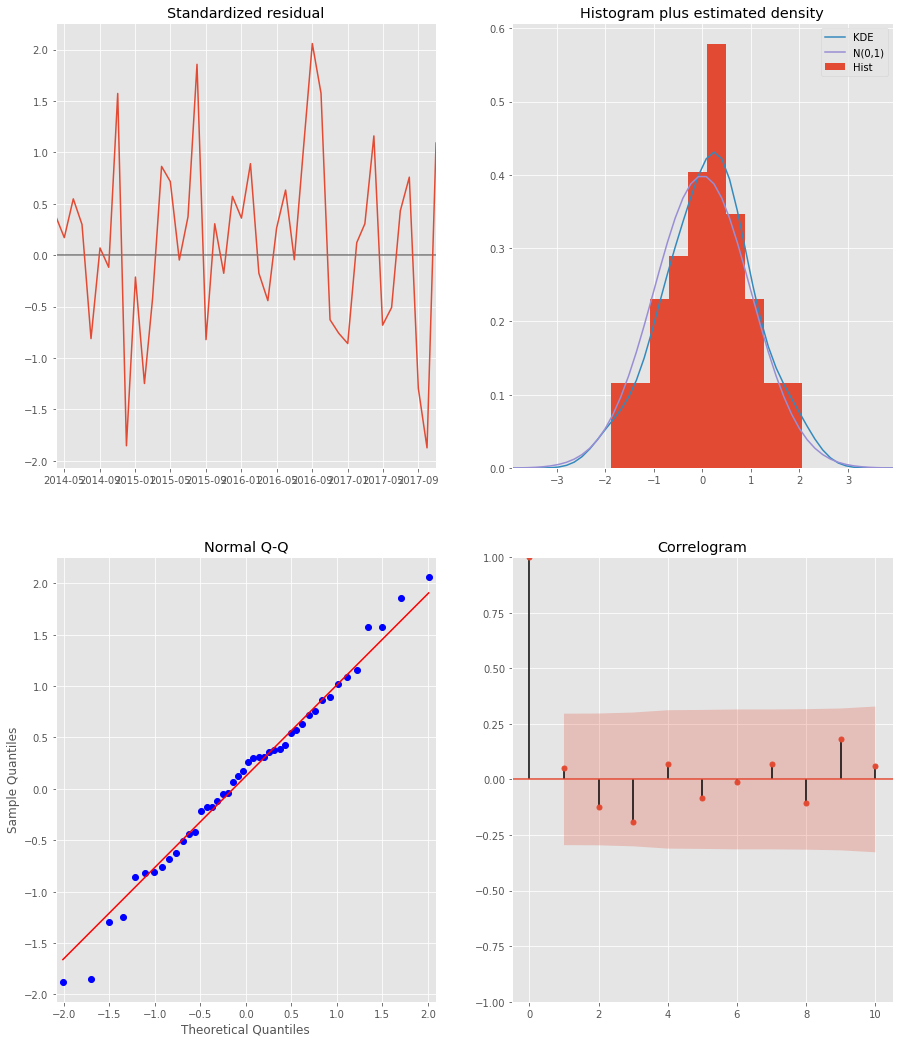

In [18]:
output.plot_diagnostics(figsize=(15, 18))
plt.show()

In [19]:
# Get forecast 500 steps ahead in future
prediction = output.get_forecast(steps=50)

# Get confidence intervals of forecasts
pred_conf = prediction.conf_int()

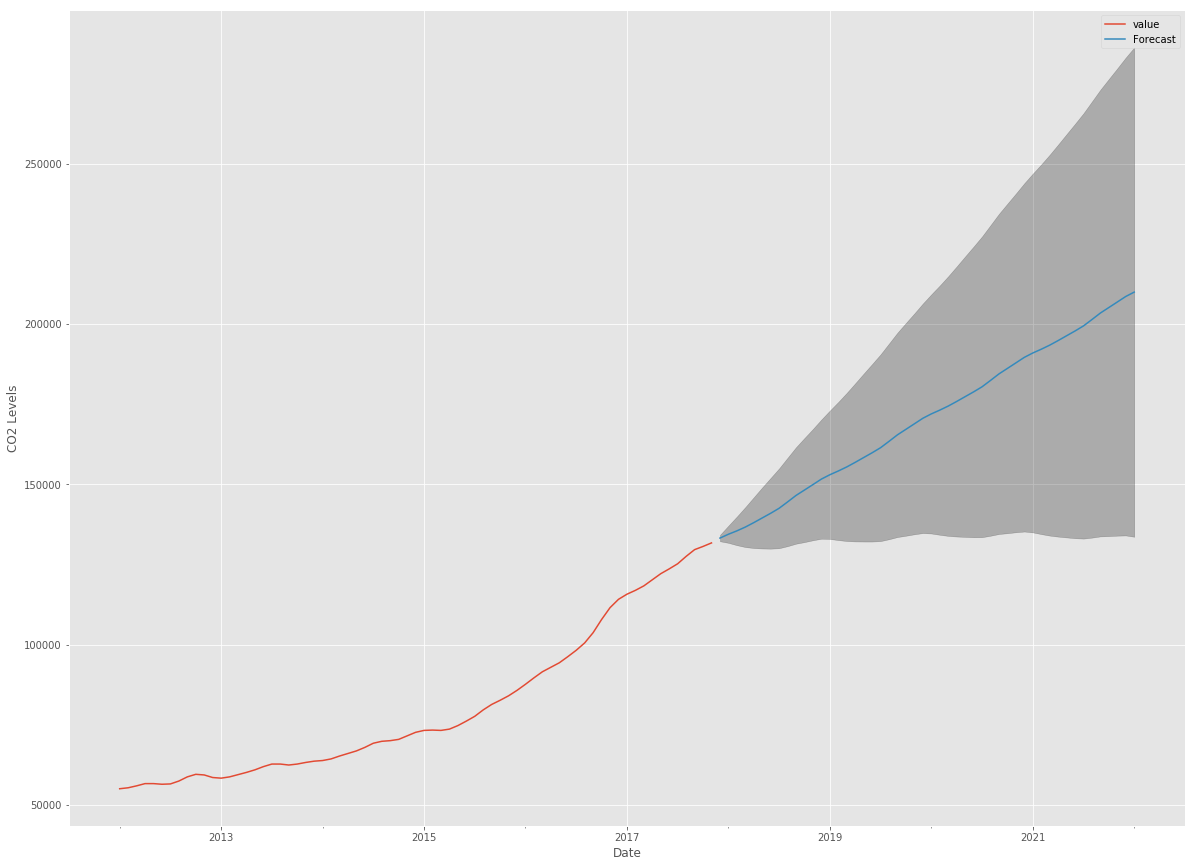

In [20]:
ax = top20zipcode_dicts[32905].plot(label='observed', figsize=(20, 15))
prediction.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_conf.index,
                pred_conf.iloc[:, 0],
                pred_conf.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('CO2 Levels')

plt.legend()
plt.show()

In [21]:
top20zipcode_dicts

{33313:                value
 time                
 2012-01-01   92800.0
 2012-02-01   93000.0
 2012-03-01   93200.0
 2012-04-01   93300.0
 2012-05-01   93700.0
 2012-06-01   94200.0
 2012-07-01   94700.0
 2012-08-01   95000.0
 2012-09-01   95700.0
 2012-10-01   96300.0
 2012-11-01   96700.0
 2012-12-01   97500.0
 2013-01-01   98500.0
 2013-02-01   99900.0
 2013-03-01  102100.0
 2013-04-01  105100.0
 2013-05-01  107500.0
 2013-06-01  108800.0
 2013-07-01  109200.0
 2013-08-01  109900.0
 2013-09-01  110800.0
 2013-10-01  111600.0
 2013-11-01  113000.0
 2013-12-01  114500.0
 2014-01-01  115600.0
 2014-02-01  117400.0
 2014-03-01  119900.0
 2014-04-01  121600.0
 2014-05-01  123100.0
 2014-06-01  125400.0
 ...              ...
 2015-06-01  148100.0
 2015-07-01  149000.0
 2015-08-01  149900.0
 2015-09-01  149800.0
 2015-10-01  149300.0
 2015-11-01  150000.0
 2015-12-01  151600.0
 2016-01-01  152200.0
 2016-02-01  152100.0
 2016-03-01  152600.0
 2016-04-01  154100.0
 2016-05-01  155700.0
 20

In [22]:
# Run a grid with pdq and seasonal pdq parameters calculated above and get the best AIC value
def model_SARIMA_zipcode(df, pdq,pdqs):
    ans = []
    for comb in pdq:
        for combs in pdqs:
            try:
                mod = sm.tsa.statespace.SARIMAX(df,
                                                order=comb,
                                                seasonal_order=combs,
                                                enforce_stationarity=False,
                                                enforce_invertibility=False)

                output = mod.fit()
                ans.append([comb, combs, output.aic])

            except:
                continue
                
    ans_df = pd.DataFrame(ans, columns=['pdq', 'pdqs', 'aic'])
#     ans_df.loc[ans_df['aic'].idxmin()]
    
    ARIMA_MODEL = sm.tsa.statespace.SARIMAX(df,
                                order=ans_df.loc[ans_df['aic'].idxmin()]['pdq'],
                                seasonal_order=ans_df.loc[ans_df['aic'].idxmin()]['pdqs'],
                                enforce_stationarity=False,
                                enforce_invertibility=False)

    output = ARIMA_MODEL.fit()
    # Get forecast 60 steps ahead in future
    prediction = output.get_forecast(steps=60)

    # Get confidence intervals of forecasts
    pred_conf = prediction.conf_int()
    return prediction

In [23]:
pred_20zipcodes={}
for zipcode in top20zipcode_dicts.keys():
    pred_20zipcodes[zipcode]= model_SARIMA_zipcode(top20zipcode_dicts[zipcode],pdq,pdqs)

/Users/jjherranzsarrion/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/jjherranzsarrion/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/jjherranzsarrion/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/jjherranzsarrion/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/jjherranzsarrion/anaconda3/envs/learn-env/lib/python3.6/site-pack

/Users/jjherranzsarrion/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/jjherranzsarrion/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/jjherranzsarrion/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/jjherranzsarrion/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/jjherranzsarrion/anaconda3/envs/learn-env/lib/python3.6/

/Users/jjherranzsarrion/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/jjherranzsarrion/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/jjherranzsarrion/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/jjherranzsarrion/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/jjherranzsarrion/anaconda3/envs/learn-env/lib/python3.6/

/Users/jjherranzsarrion/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/jjherranzsarrion/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/jjherranzsarrion/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/jjherranzsarrion/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/jjherranzsarrion/anaconda3/envs/learn-env/lib/python3.6/site-pack

/Users/jjherranzsarrion/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/jjherranzsarrion/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/jjherranzsarrion/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/jjherranzsarrion/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/jjherranzsarrion/anaconda3/envs/learn-env/lib/python3.6/site-pack

/Users/jjherranzsarrion/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/jjherranzsarrion/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/jjherranzsarrion/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/jjherranzsarrion/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/jjherranzsarrion/anaconda3/envs/learn-env/lib/python3.6/

/Users/jjherranzsarrion/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/jjherranzsarrion/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/jjherranzsarrion/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/jjherranzsarrion/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/jjherranzsarrion/anaconda3/envs/learn-env/lib/python3.6/site-pack

/Users/jjherranzsarrion/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/jjherranzsarrion/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/jjherranzsarrion/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/jjherranzsarrion/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/jjherranzsarrion/anaconda3/envs/learn-env/lib/python3.6/

/Users/jjherranzsarrion/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/jjherranzsarrion/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/jjherranzsarrion/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/jjherranzsarrion/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/jjherranzsarrion/anaconda3/envs/learn-env/lib/python3.6/site-pack

/Users/jjherranzsarrion/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/jjherranzsarrion/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/jjherranzsarrion/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/jjherranzsarrion/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/jjherranzsarrion/anaconda3/envs/learn-env/lib/python3.6/site-pack

/Users/jjherranzsarrion/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/jjherranzsarrion/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/jjherranzsarrion/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/jjherranzsarrion/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/jjherranzsarrion/anaconda3/envs/learn-env/lib/python3.6/

/Users/jjherranzsarrion/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/jjherranzsarrion/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/jjherranzsarrion/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/jjherranzsarrion/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/jjherranzsarrion/anaconda3/envs/learn-env/lib/python3.6/site-pack

/Users/jjherranzsarrion/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/jjherranzsarrion/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/jjherranzsarrion/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/jjherranzsarrion/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/jjherranzsarrion/anaconda3/envs/learn-env/lib/python3.6/site-pack

/Users/jjherranzsarrion/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/jjherranzsarrion/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/jjherranzsarrion/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/jjherranzsarrion/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/jjherranzsarrion/anaconda3/envs/learn-env/lib/p

/Users/jjherranzsarrion/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/jjherranzsarrion/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/jjherranzsarrion/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/jjherranzsarrion/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/jjherranzsarrion/anaconda3/envs/learn-env/lib/python3.6/site-pack

/Users/jjherranzsarrion/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/jjherranzsarrion/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/jjherranzsarrion/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/jjherranzsarrion/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/jjherranzsarrion/anaconda3/envs/learn-env/lib/python3.6/

/Users/jjherranzsarrion/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/jjherranzsarrion/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/jjherranzsarrion/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/jjherranzsarrion/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/jjherranzsarrion/anaconda3/envs/learn-env/lib/python3.6/site-pack

/Users/jjherranzsarrion/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/jjherranzsarrion/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/jjherranzsarrion/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/jjherranzsarrion/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/jjherranzsarrion/anaconda3/envs/learn-env/lib/python3.6/site-pack

/Users/jjherranzsarrion/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/jjherranzsarrion/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/jjherranzsarrion/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/jjherranzsarrion/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/jjherranzsarrion/anaconda3/envs/learn-env/lib/python3.6/site-pack

/Users/jjherranzsarrion/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/jjherranzsarrion/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/jjherranzsarrion/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/jjherranzsarrion/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/jjherranzsarrion/anaconda3/envs/learn-env/lib/python3.6/site-pack

/Users/jjherranzsarrion/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/jjherranzsarrion/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/jjherranzsarrion/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/jjherranzsarrion/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/jjherranzsarrion/anaconda3/envs/learn-env/lib/python3.6/site-pack

/Users/jjherranzsarrion/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/jjherranzsarrion/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/jjherranzsarrion/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/jjherranzsarrion/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/jjherranzsarrion/anaconda3/envs/learn-env/lib/python3.6/site-pack

/Users/jjherranzsarrion/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/jjherranzsarrion/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/jjherranzsarrion/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/jjherranzsarrion/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/jjherranzsarrion/anaconda3/envs/learn-env/lib/python3.6/

/Users/jjherranzsarrion/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/jjherranzsarrion/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/jjherranzsarrion/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/jjherranzsarrion/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/jjherranzsarrion/anaconda3/envs/learn-env/lib/python3.6/site-pack

/Users/jjherranzsarrion/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/jjherranzsarrion/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/jjherranzsarrion/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/jjherranzsarrion/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/jjherranzsarrion/anaconda3/envs/learn-env/lib/python3.6/

/Users/jjherranzsarrion/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/jjherranzsarrion/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/jjherranzsarrion/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/jjherranzsarrion/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/jjherranzsarrion/anaconda3/envs/learn-env/lib/p

/Users/jjherranzsarrion/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/jjherranzsarrion/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/jjherranzsarrion/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/jjherranzsarrion/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/jjherranzsarrion/anaconda3/envs/learn-env/lib/python3.6/

/Users/jjherranzsarrion/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/jjherranzsarrion/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/jjherranzsarrion/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/jjherranzsarrion/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/jjherranzsarrion/anaconda3/envs/learn-env/lib/python3.6/site-pack

/Users/jjherranzsarrion/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/jjherranzsarrion/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/jjherranzsarrion/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/jjherranzsarrion/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/jjherranzsarrion/anaconda3/envs/learn-env/lib/python3.6/site-pack

/Users/jjherranzsarrion/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/jjherranzsarrion/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/jjherranzsarrion/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/jjherranzsarrion/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/jjherranzsarrion/anaconda3/envs/learn-env/lib/python3.6/site-pack

/Users/jjherranzsarrion/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/jjherranzsarrion/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/jjherranzsarrion/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/jjherranzsarrion/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/jjherranzsarrion/anaconda3/envs/learn-env/lib/python3.6/site-pack

/Users/jjherranzsarrion/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/jjherranzsarrion/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/jjherranzsarrion/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/jjherranzsarrion/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/jjherranzsarrion/anaconda3/envs/learn-env/lib/python3.6/site-pack

/Users/jjherranzsarrion/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/jjherranzsarrion/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/jjherranzsarrion/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/jjherranzsarrion/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/jjherranzsarrion/anaconda3/envs/learn-env/lib/python3.6/

/Users/jjherranzsarrion/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/jjherranzsarrion/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/jjherranzsarrion/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/jjherranzsarrion/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/jjherranzsarrion/anaconda3/envs/learn-env/lib/python3.6/site-pack

/Users/jjherranzsarrion/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/jjherranzsarrion/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/jjherranzsarrion/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/jjherranzsarrion/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/jjherranzsarrion/anaconda3/envs/learn-env/lib/python3.6/site-pack

/Users/jjherranzsarrion/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/jjherranzsarrion/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/jjherranzsarrion/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/jjherranzsarrion/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/jjherranzsarrion/anaconda3/envs/learn-env/lib/python3.6/

/Users/jjherranzsarrion/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/jjherranzsarrion/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/jjherranzsarrion/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/jjherranzsarrion/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/jjherranzsarrion/anaconda3/envs/learn-env/lib/python3.6/

/Users/jjherranzsarrion/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/jjherranzsarrion/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/jjherranzsarrion/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/jjherranzsarrion/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/jjherranzsarrion/anaconda3/envs/learn-env/lib/python3.6/site-pack

/Users/jjherranzsarrion/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/jjherranzsarrion/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/jjherranzsarrion/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/jjherranzsarrion/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/jjherranzsarrion/anaconda3/envs/learn-env/lib/python3.6/

In [24]:
pred_20zipcodes[32905].predicted_mean.head()

2017-12-01    133172.921081
2018-01-01    134359.835998
2018-02-01    135393.772725
2018-03-01    136555.493197
2018-04-01    137895.958578
Freq: MS, dtype: float64

In [25]:
pred_20zipcodes[32905].conf_int()

,lower value,upper value
2017-12-01,132353.898938,133991.943225
2018-01-01,132147.529049,136572.142947
2018-02-01,131705.948905,139081.596546
2018-03-01,131402.625481,141708.360913
2018-04-01,131330.604569,144461.312588
2018-05-01,131414.246676,147230.497233
2018-06-01,131592.789990,149945.524799
2018-07-01,131948.387018,152691.215605
2018-08-01,132764.471969,155759.531869
2018-09-01,133706.870449,158827.259507


In [26]:
len(pred_20zipcodes[32905].conf_int())

60

In [27]:
pred_20zipcodes[32905].conf_int().index

DatetimeIndex(['2017-12-01', '2018-01-01', '2018-02-01', '2018-03-01',
               '2018-04-01', '2018-05-01', '2018-06-01', '2018-07-01',
               '2018-08-01', '2018-09-01', '2018-10-01', '2018-11-01',
               '2018-12-01', '2019-01-01', '2019-02-01', '2019-03-01',
               '2019-04-01', '2019-05-01', '2019-06-01', '2019-07-01',
               '2019-08-01', '2019-09-01', '2019-10-01', '2019-11-01',
               '2019-12-01', '2020-01-01', '2020-02-01', '2020-03-01',
               '2020-04-01', '2020-05-01', '2020-06-01', '2020-07-01',
               '2020-08-01', '2020-09-01', '2020-10-01', '2020-11-01',
               '2020-12-01', '2021-01-01', '2021-02-01', '2021-03-01',
               '2021-04-01', '2021-05-01', '2021-06-01', '2021-07-01',
               '2021-08-01', '2021-09-01', '2021-10-01', '2021-11-01',
               '2021-12-01', '2022-01-01', '2022-02-01', '2022-03-01',
               '2022-04-01', '2022-05-01', '2022-06-01', '2022-07-01',
      

In [29]:
merged = pd.DataFrame(data=None)
for i in pred_20zipcodes.keys():
    df=pd.DataFrame()
    df['date']= pred_20zipcodes[i].conf_int().index
    df['zipcode'] = i
    df['pred_mean'] = np.array(pred_20zipcodes[i].predicted_mean)
    df['lower_value']=np.array(pred_20zipcodes[i].conf_int()['lower value'])
    df['upper_value']=np.array(pred_20zipcodes[i].conf_int()['upper value'])
    merged = pd.concat([merged, df], axis=0)

In [ ]:
data = []

for i in pred_20zipcodes.keys():   
    date = pred_20zipcodes[i].conf_int().index
    df['zipcode'] = i
    data.append({'date': date, 'zipcode': zipcode})

pd.DataFrame(data)

In [30]:
from datetime import datetime

years = range(2018, 2023)
year_month_list = [datetime.strptime(f'{year}-07-01', '%Y-%m-%d').date() for year in years]
forecast_returns = merged.loc[merged['date'].isin(year_month_list)]

In [31]:
forecast_returns['pred_returns'] = forecast_returns['pred_mean'].div(
    forecast_returns.groupby('zipcode')['pred_mean'].shift(1))

In [32]:
forecast_returns = forecast_returns.dropna(subset=['pred_returns'])

In [33]:
def predicted_annualised_returns(df):
    pred_annualised_return = {}
    for zipcode in df['zipcode']:
        returns = list(df.loc[(df['zipcode'] == zipcode)]['pred_returns'])
        
        tot_return = 1
        for r in returns:
            tot_return = tot_return * r 
        
        pred_annualised = (tot_return ** (1/len(returns))) - 1
        pred_annualised_return[zipcode] = pred_annualised 
        
    return pred_annualised_return

In [34]:
forecast_returns = predicted_annualised_returns(forecast_returns)

In [35]:
forecast_returns_df = pd.DataFrame(list(forecast_returns.items()),
                                      columns=['zipcode', 'Pred_ann_returns'])

In [36]:
forcast_returns_sorted = forecast_returns_df.sort_values('Pred_ann_returns', ascending=False)

In [37]:
print(f"top 5 zipcodes with Pred_ann_returns are {forcast_returns_sorted['Pred_ann_returns'][:5]}")

top 5 zipcodes with Pred_ann_returns are 14    0.204978
18    0.192629
2     0.181491
11    0.169370
13    0.163469
Name: Pred_ann_returns, dtype: float64


In [38]:
with open('forcast_returns_sorted.pickle', 'wb') as f:
    pickle.dump(forcast_returns_sorted, f, pickle.HIGHEST_PROTOCOL)

In [42]:
with open('pred_20zipcodes.pickle', 'wb') as f:
    pickle.dump(pred_20zipcodes, f, pickle.HIGHEST_PROTOCOL)

In [41]:
merged

,date,zipcode,pred_mean,lower_value,upper_value
0,2017-12-01,33313,225791.996217,224385.958327,227198.034108
1,2018-01-01,33313,229900.895220,225836.687762,233965.102679
2,2018-02-01,33313,232973.608761,226004.365162,239942.852361
3,2018-03-01,33313,235666.426023,225731.381765,245601.470282
4,2018-04-01,33313,238676.697879,225813.698804,251539.696955
5,2018-05-01,33313,241821.865852,226119.056336,257524.675369
6,2018-06-01,33313,244585.827839,226155.341752,263016.313926
7,2018-07-01,33313,247757.915960,226721.089896,268794.742024
8,2018-08-01,33313,251004.432068,227483.427754,274525.436382
9,2018-09-01,33313,254939.802431,229052.944691,280826.660170
